In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import random

random.seed(150)
plt.style.use('pablet')

In [2]:
#Número de estrellas
n= 1000000

In [3]:
def stars(n):
    star_mass= []
    star_alpha= []
    for _ in range(n):
        star_m= (random.uniform(0.08, 100))
        star_mass.append(star_m)
        if 0.08 <= star_m <0.5:
            star_alpha.append(1.3)
        else:
            star_alpha.append(2.3)
    return np.asarray(star_mass), np.asarray(star_alpha)

star_mass, star_alpha = stars(n)

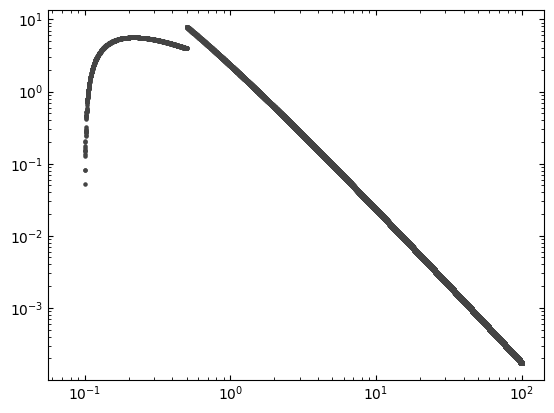

In [4]:
plt.scatter(star_mass, (star_mass**(-star_alpha))*np.log(10*star_mass), s=5, c='#444444')
plt.xscale('log')
plt.yscale('log')

In [5]:
def SFR(n):
    birth_time= np.linspace(0, 10, n)
    random.shuffle(birth_time)
    return birth_time

birth_time= SFR(n)

Text(0, 0.5, 'N')

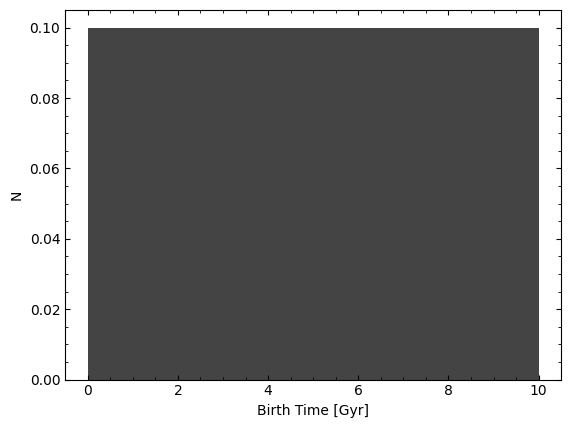

In [6]:
plt.hist(birth_time, bins=100, density=True, color='#444444')
plt.xlabel('Birth Time [Gyr]')
plt.ylabel('N')

In [7]:
#MS lifetime
def MS_lt(n):
    lifetime= 10/(star_mass**2.5)
    return lifetime

lifetime= MS_lt(n)

In [8]:
# MS=0
# WD=1
# NS=2
# BH=3
def remnant(star_mass, birth_time, lifetime):
    remanente= []
    final_mass= []
    j=0
    for i in lifetime:
        if i < birth_time[j]:
            remanente.append(0)
            final_mass.append(star_mass[j])
        elif i > birth_time[j] and star_mass[j] < 9:
            remanente.append(1)
            final_mass.append(0.109*star_mass[j]+0.394)
        elif i > birth_time[j] and 9 <= star_mass[j] < 18.5:
            remanente.append(2)
            if 9 <= star_mass[j] <= 13:
                final_mass.append(2.24+0.508*(star_mass[j]-14.75)+0.125*(star_mass[j]-14.75)**2+0.0110*(star_mass[j]-14.75)**3)
            elif 13 < star_mass[j] < 15:
                final_mass.append(0.123+0.112*star_mass[j])
            elif 15 <= star_mass[j] < 17.8:
                final_mass.append(0.996+0.0384*star_mass[j])
            elif 17.8 <= star_mass[j] < 18.5:
                final_mass.append(-0.020+0.10*star_mass[j])
        elif i > birth_time[j] and star_mass[j] >= 18.5:
            remanente.append(3)
            if 18.5 <= star_mass[j] < 40:
                final_mass.append(0.9*(-2.049+0.4140*star_mass[j])+(1-0.9)*(15.52-0.3294*(star_mass[j]-25.97)-0.02121*(star_mass[j]-25.97)**2+0.003120*(star_mass[j]-25.97)**3))
            elif 40 <= star_mass[j] < 120:
                final_mass.append(5.697+7.8598*(10**8)*star_mass[j]**(-4.858))
        j+=1
    return np.asarray(remanente), np.asarray(final_mass)

remanente, final_mass= remnant(star_mass, birth_time, lifetime)

Text(0, 0.5, 'Final Mass [M$_\\odot$]')

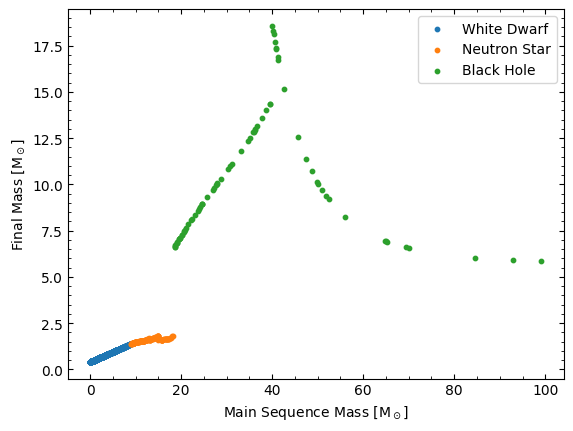

In [9]:
MS= np.where(remanente==0)
WD= np.where(remanente==1)
NS= np.where(remanente==2)
BH= np.where(remanente==3)

plt.scatter(star_mass[WD], final_mass[WD], s=10, label='White Dwarf')
plt.scatter(star_mass[NS], final_mass[NS], s=10, label='Neutron Star')
plt.scatter(star_mass[BH], final_mass[BH], s=10, label='Black Hole')
plt.legend(loc='best')
plt.xlabel('Main Sequence Mass [M$_\odot$]')
plt.ylabel('Final Mass [M$_\odot$]')

(0.0, 20.0)

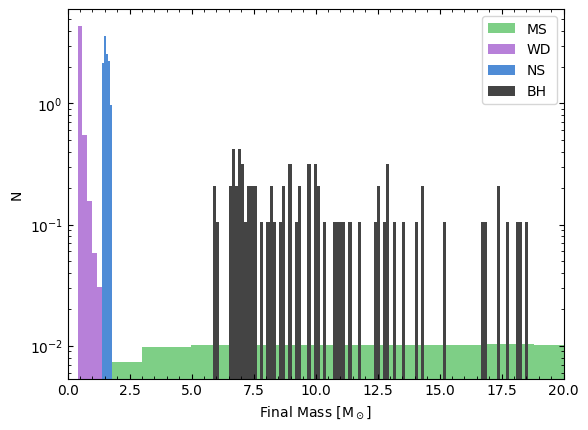

In [10]:
plt.hist(final_mass[MS], bins=50, range=(min(final_mass[MS]),max(final_mass[MS])), label='MS', color='#7ecf86', density=True)
plt.hist(final_mass[WD], bins=5, range=(min(final_mass[WD]),max(final_mass[WD])), label='WD', color='#b780d9', density=True)
plt.hist(final_mass[NS], bins=5, range=(min(final_mass[NS]),max(final_mass[NS])), label='NS', color='#4f8cd6', density=True)
plt.hist(final_mass[BH], bins=100, range=(min(final_mass[BH]),max(final_mass[BH])), label='BH', color='#444444', density=True)

plt.xlabel('Final Mass [M$_\odot$]')
plt.ylabel('N')
plt.yscale('log')
plt.legend(loc='best')
plt.xlim(0,20)

In [11]:
print('Fracción de Main Sequence Stars: ' + str(len(final_mass[MS])/n) + ' = ' + str(len(final_mass[MS])*100/n) + ' %')
print('Fracción de White Dwarfs: ' + str(len(final_mass[WD])/n) + ' = ' + str(len(final_mass[WD])*100/n) + ' %')
print('Fracción de Neutron Stars: ' + str(len(final_mass[NS])/n) + ' = ' + str(len(final_mass[NS])*100/n) + ' %')
print('Fracción de Black Holes: ' + str(len(final_mass[BH])/n) + ' = ' + str(len(final_mass[BH])*100/n) + ' %')

print('Fracción Total de Masa: ',len(final_mass[MS])/n+len(final_mass[WD])/n+len(final_mass[NS])/n+len(final_mass[BH])/n)

Fracción de Main Sequence Stars: 0.984062 = 98.4062 %
Fracción de White Dwarfs: 0.015709 = 1.5709 %
Fracción de Neutron Stars: 0.000154 = 0.0154 %
Fracción de Black Holes: 7.5e-05 = 0.0075 %
Fracción Total de Masa:  1.0


Text(0, 0.5, 'N')

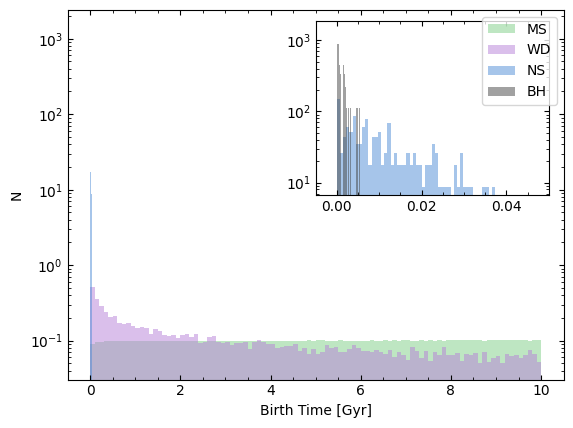

In [12]:
fig, ax = plt.subplots()

ax.hist(birth_time[MS], bins=100, range=(0,10), alpha=.5, label='MS', color='#7ecf86', density=True)
ax.hist(birth_time[WD], bins=100, range=(0,10), alpha=.5, label='WD', color='#b780d9', density=True)
ax.hist(birth_time[NS], bins=50, range=(min(birth_time[NS]),max(birth_time[NS])), alpha=.5, label='NS', color='#4f8cd6', density=True)
ax.hist(birth_time[BH], bins=50, range=(min(birth_time[BH]),max(birth_time[BH])), alpha=.5, label='BH', color='#444444', density=True)
ax.set_yscale('log')
plt.legend()

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47], xlim=(-0.005, 0.05), xticklabels=[], yticklabels=[])
axins.hist(birth_time[NS], bins=50, range=(min(birth_time[NS]),max(birth_time[NS])), alpha=.5, label='NS', color='#4f8cd6', density=True)
axins.hist(birth_time[BH], bins=50, range=(min(birth_time[BH]),max(birth_time[BH])), alpha=.5, label='BH', color='#444444', density=True)
axins.set_yscale('log')
axins.set_xscale('linear')

ax.set_xlabel('Birth Time [Gyr]')
ax.set_ylabel('N')